In [1]:
### Using decision trees to diagnose breast cancer
# Loading the dataset
from sklearn import datasets
data = datasets.load_breast_cancer()
print(data.feature_names)
data.target

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [2]:
data.data.shape

(569, 30)

In [3]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
# split train & test datasets
from sklearn import model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [5]:
print(x_train.shape)
x_test.shape

(455, 30)


(114, 30)

In [6]:
# Building the decision tree
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
dtc.score(x_train, y_train)

1.0

In [8]:
dtc.score(x_test, y_test)

0.9385964912280702

In [9]:
with open('decision_tree_apply.dot', 'w') as f:
    tree.export_graphviz(dtc, out_file=f, feature_names=data.feature_names,class_names=data.target_names)

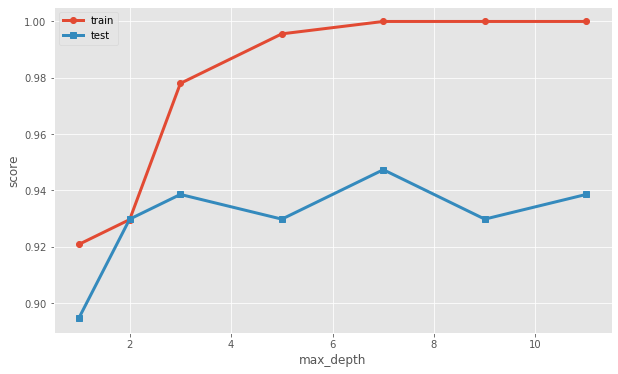

In [16]:
### find the best tree depth
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

max_depths = [1, 2, 3, 5, 7, 9, 11]
train_score = []
test_score = []
for depth in max_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=depth)
    dtc.fit(x_train, y_train)
    train_score.append(dtc.score(x_train, y_train))
    test_score.append(dtc.score(x_test, y_test))
# plot depths vs. scores
plt.figure(figsize=(10,6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend(loc='best')

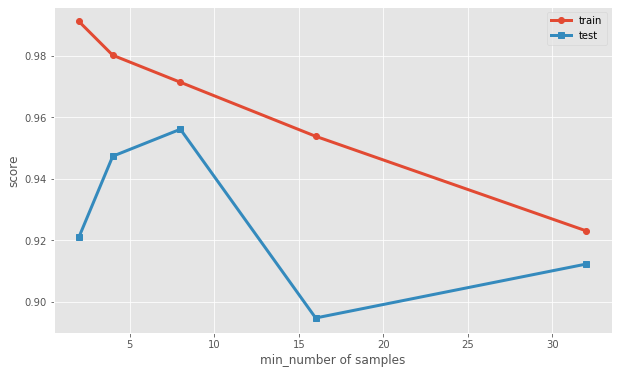

In [17]:
# find the best min_number of samples to create a leaf
train_score = []
test_score = []
min_numbers = [2, 4, 8, 16, 32]
for num in min_numbers:
    dtc = tree.DecisionTreeClassifier(min_samples_leaf=num)
    dtc.fit(x_train, y_train)
    train_score.append(dtc.score(x_train, y_train))
    test_score.append(dtc.score(x_test, y_test))
plt.figure(figsize=(10,6))
plt.plot(min_numbers, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_numbers, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_number of samples')
plt.ylabel('score')
plt.legend(loc='best')

In [35]:
# decision tree to do regression
rng = np.random.RandomState(42)
x = np.sort(rng.rand(100, 1) * 5, axis=0)
y = np.sin(x).ravel()
y[::2] += 0.5 * (0.5 - rng.rand(50)) # add noise

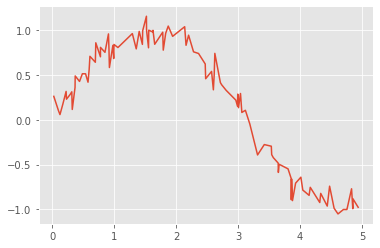

In [37]:
plt.plot(x,y)

In [38]:
# decision tree to do regression
regr1 = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
regr1.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [39]:
regr2 = tree.DecisionTreeRegressor(max_depth=6, random_state=42)
regr2.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

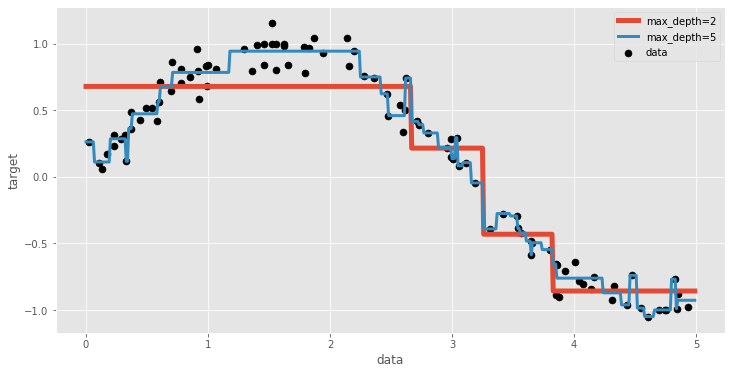

In [45]:
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr1.predict(x_test)
y_2 = regr2.predict(x_test)
plt.figure(figsize=(12,6))
plt.scatter(x, y, c='k', s=50, label='data')
plt.plot(x_test, y_1, label='max_depth=2', linewidth=5)
plt.plot(x_test, y_2, label="max_depth=5", linewidth=3)
plt.xlabel('data')
plt.ylabel('target')
plt.legend(loc='best')